# code for choosing images at random
no more unsupervised ML

In [42]:
import random
import xarray as xr
import numpy as np
from glob import glob
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import iqr
import os


In [43]:
# function to slice out images that don't make the threshold of being viable for the CNN
def reduce_df(big_df):
    smaller_df = big_df[
    (big_df['Euclidean_d_max'] >= 300) &
    (big_df['first_diode_trunc'] == 0) &
    (big_df['last_diode_trunc'] == 0) &
    (big_df['image_trunc'] == 0) &
    (~big_df.isnull().any(axis=1))]  # Exclude rows with NaN
    return smaller_df
    
## where are the files?
data_path = '/gws/nopw/j04/dcmex/users/ezriab/processed_stats/'
ds_csv = '2ds/all_2ds.csv'
hvps_csv = 'hvps/particle_stats/all_hvps.csv'
all_csv = 'all_2ds_hvps.csv'

## loop to open up the csv files into a dictionary
data_loc = [ds_csv,hvps_csv,all_csv]
key_names = ['ch01','hvps','all']

data_dic = {}
for d in range(3):
    data_dic[key_names[d]]={} 
    loop_df = pd.read_csv(data_path+data_loc[d])
    df_reduced = reduce_df(loop_df)  
    data_dic[key_names[d]]['df'] = loop_df
    data_dic[key_names[d]]['reduced'] = df_reduced

In [44]:
data_dic['ch01']['reduced']['name']

24          1176_19ch0
25          1216_19ch0
27          1271_19ch0
32          1507_19ch0
36          1638_19ch0
              ...     
957727    629810_08ch1
957728    629832_08ch1
957730    631987_08ch1
957732    632230_08ch1
957735    640278_08ch1
Name: name, Length: 214638, dtype: object

## making random choice
using reduced set of images

In [45]:
ch01_n_lst = list(data_dic['ch01']['reduced']['name'])

random.seed(42) # !! v important, means we choose same set images every time. 

key_names = ['ch01','hvps','all']
sample_sizes = [1500, 1000, 500] ## how many samples would you like
random_choice = {}

for d in range(3):
    random_choice[key_names[d]]={} 
    data = data_dic[key_names[d]]['reduced']
    random_choice[key_names[d]]['og_df'] = data # adding in original df for easy comparison
    name_list = list(data['name'])
    for r in range(len(sample_sizes)):
        r_sample_list = random.sample(name_list, k=sample_sizes[r])
        r_sample_df = data[data['name'].isin(r_sample_list)]
        random_choice[key_names[d]][f'sample_{sample_sizes[r]}'] = r_sample_df

## importantly, random.choices does replacement, so can get duplicates
# so random.sample is a better option for us
'''
ch01_random_1000_n = random.choices(ch01_n_lst, k=1000) 
ch01_random_500_n = random.choices(ch01_n_lst, k=500)
ch01_random_1500_n = random.choices(ch01_n_lst, k=1500)

ch01_random_1500_n = random.sample(ch01_n_lst, k=1500)
ch01_random_1000_n = random.sample(ch01_n_lst, k=1000) 
ch01_random_500_n = random.sample(ch01_n_lst, k=500)
'''

'\nch01_random_1000_n = random.choices(ch01_n_lst, k=1000) \nch01_random_500_n = random.choices(ch01_n_lst, k=500)\nch01_random_1500_n = random.choices(ch01_n_lst, k=1500)\n\nch01_random_1500_n = random.sample(ch01_n_lst, k=1500)\nch01_random_1000_n = random.sample(ch01_n_lst, k=1000) \nch01_random_500_n = random.sample(ch01_n_lst, k=500)\n'

In [52]:
r_sample_list

['194704_23ch0',
 '891806_19hvps',
 '377078_06ch1',
 '370691_01ch0',
 '717148_31hvps',
 '3769123_23hvps',
 '3679916_23hvps',
 '14246_26hvps',
 '527048_31hvps',
 '643103_31hvps',
 '1439248_19hvps',
 '348627_25hvps',
 '2079719_25ch1',
 '1331483_23ch1',
 '1041619_25ch1',
 '6585_07hvps',
 '118655_08ch0',
 '867803_31hvps',
 '2069703_31hvps',
 '225766_31hvps',
 '182267_07hvps',
 '1144979_23hvps',
 '2196822_20ch0',
 '2000201_31hvps',
 '105437_01hvps',
 '2547904_19hvps',
 '2894116_23hvps',
 '1035029_25ch0',
 '480758_23ch0',
 '311094_07hvps',
 '63331_07hvps',
 '629032_31hvps',
 '2626765_19hvps',
 '705490_23ch0',
 '2092334_19hvps',
 '1225133_23ch1',
 '450069_31hvps',
 '232371_30hvps',
 '835135_31hvps',
 '278255_01hvps',
 '2536338_19hvps',
 '2674681_19hvps',
 '1284948_19ch1',
 '964703_19ch1',
 '1544294_25ch0',
 '358923_25hvps',
 '457734_20ch1',
 '2411649_25ch1',
 '383930_06ch1',
 '3495_03ch0',
 '645155_31hvps',
 '453131_31hvps',
 '949493_25ch1',
 '59671_06hvps',
 '528648_25ch1',
 '1985129_19hvps'

In [56]:
base_img_pth = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/'
hvps_folders = os.listdir(base_img_pth+'hvps/')
ch0_img_folders = os.listdir(base_img_pth+'2ds/ch_0/')
ch1_img_folders = os.listdir(base_img_pth+'2ds/ch_1/')


#dictionaries containing list of all file names
probe_file_names = ['hvps','ch0','ch1']
probe_file_extensions = ['hvps/','2ds/ch_0/','2ds/ch_1/']
probe_file_list = [hvps_folders, ch0_img_folders, ch1_img_folders]
full_file_dic = dict.fromkeys(probe_file_names)


## making dictionary each probe + each folder of h5 file + path to each png image
for i in range(3):
    full_file_dic[probe_file_names[i]] = {}
    for date in probe_file_list[i]:
        date_path = base_img_pth+probe_file_extensions[i]+date+'/'
        file_list = glob(date_path+'*.png')
        #file_names = [os.path.basename(file_path) for file_path in file_list]
        full_file_dic[probe_file_names[i]][date] = file_list

In [57]:
all_dates = list(full_file_dic['ch0'].keys())
all_dates

['220622110532',
 '220622113222',
 '220622114324',
 '220622114344',
 '220719154358',
 '220720161837',
 '220722154658',
 '220722164909',
 '220723153010',
 '220725153309',
 '220726150340',
 '220727154103',
 '220727160514',
 '220727160554',
 '220727160906',
 '220729153228',
 '220730153000',
 '220801154558',
 '220802153538',
 '220803153030',
 '220804160810',
 '220806151304',
 '220806153351',
 '220807160624',
 '220807183300',
 '220808160342']

In [81]:
#r_sample_list = r_sample_list[:11]
len(r_sample_list)

11

In [86]:
random_save_name = 'test_random_sample'
save_loc = '/gws/nopw/j04/dcmex/users/ezriab/image_labelling/' # for csv + images to be stored together
full_save_path = save_loc+random_save_name+'/'

full_loc_file_list = []
for name in r_sample_list:
    slice_n, date_probe = name.split('_')
    day_n = date_probe[:2]
    probe = date_probe[2:]
    potential_dates = [f'2207{day_n}',f'2208{day_n}']

    folders_contain_date = []
    all_dates = list(full_file_dic[probe].keys())
    for folder_name in all_dates:
        if potential_dates[0] in folder_name or potential_dates[1] in folder_name:
            folders_contain_date.append(folder_name)
    
    for f in folders_contain_date:
        files_in_f = full_file_dic[probe][f]
        #print(files_in_f[0])
        #if name in files_in_f:
        if any(name in file_path for file_path in files_in_f):
            for individual_file in files_in_f:
                if name in individual_file:
                    full_loc_file_list.append(individual_file)
                    
            #og_image_loc = base_img_pth+probe+'/'+f +'/'+ name +'.png'
                #full_loc_file_list.append(og_image_loc)
    
## finally move that file 
for file_path in full_loc_file_list:
    if os.path.exists(og_image_loc) and os.path.exists(full_save_path):
        shutil.copy(og_image_loc, full_save_path)


In [94]:
len(full_loc_file_list)

real_path_list = []
for file_path in full_loc_file_list:
     if os.path.exists(file_path):
        real_path_list.append(file_path)

In [95]:
real_path_list

['/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220723153010/194704_23ch0.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220719154335/891806_19hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_1/220806153351/377078_06ch1.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220801154558/370691_01ch0.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220731191311/717148_31hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3769123_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3679916_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220726150407/14246_26hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220731191311/527048_31hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220731191311/643103_31hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220719154335/1439248_19hvps.png']

In [73]:
real_path_list

['/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',
 '/gws/nopw/j04/dcmex/users/ezriab/processed_images/hvps/220723153143/3849131_23hvps.png',

In [14]:
random_choice['ch01']['sample_1000']

,name,date,slice_s_idx,slice_e_idx,start_time,end_time,ellipse_d_max,Euclidean_d_max,Feret_d_max,area,...,first_diode_trunc,last_diode_trunc,image_trunc,aspect_ratio,wind_w,pres,alt,temp,LWC,IWC
1836,58620_19ch0,220719,58620,58636,18:49:24.771000000,18:49:24.771000000,286.522357,310.644491,321.403174,27800.0,...,0,0,0,2.107545,-5.150611,375.99597,8131.8130,254.47700,0.208892,0.159299
3088,87901_19ch0,220719,87901,87916,18:53:04.540000000,18:53:04.540000000,327.417204,322.800248,335.261092,29700.0,...,0,0,0,2.389546,-2.043195,400.87717,7644.9404,257.90890,0.046741,0.259120
4781,133658_19ch0,220719,133658,133679,18:53:07.364000000,18:53:07.364000000,314.420658,321.403174,332.415403,46200.0,...,0,0,0,1.568413,-3.136745,400.76900,7652.2910,258.01297,0.007497,0.068663
5490,154502_19ch0,220719,154502,154529,18:53:38.377000000,18:53:38.392000000,512.717404,540.832691,550.817574,91600.0,...,0,0,0,2.067830,1.583511,398.98138,7685.9550,257.16913,0.377608,0.147517
7650,209113_19ch0,220719,209113,209134,18:56:49.945000000,18:56:49.945000000,297.822393,321.403174,333.766385,41100.0,...,0,0,0,1.558248,-2.169509,388.20212,7886.1190,255.96376,0.006786,0.030449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952991,431254_08ch1,220808,431254,431281,18:15:53.467000000,18:15:53.467000000,308.105561,339.558537,349.284984,56900.0,...,0,0,0,1.209639,1.198045,467.96863,6418.2090,263.60306,0.013896,0.190955
953386,440569_08ch1,220808,440569,440598,18:15:53.872000000,18:15:53.872000000,326.239139,348.855271,357.770876,61900.0,...,0,0,0,1.281693,1.255340,467.99335,6419.1870,263.50793,0.017947,0.321674
954760,473479_08ch1,220808,473479,473529,18:15:55.682000000,18:15:55.682000000,793.737519,754.320887,764.002618,162900.0,...,0,0,0,2.766536,1.396190,468.10150,6419.2373,263.49230,0.028795,0.120204
954934,478492_08ch1,220808,478492,478514,18:15:56.415000000,18:15:56.415000000,447.439636,443.846820,453.541619,58800.0,...,0,0,0,2.462125,1.396190,468.10150,6419.2373,263.49230,0.035008,0.189740


In [25]:
## quick check if values are duplicated in this list
from collections import Counter

counter = Counter(ch01_random_1000_n)
duplicates = {name: count for name, count in counter.items() if count > 1}

print(f"Duplicates: {duplicates}")


Duplicates: {'1293981_23ch0': 2, '1284557_19ch1': 2}


## making plots of distributions
see how randomly selected ones compare to actual dataset

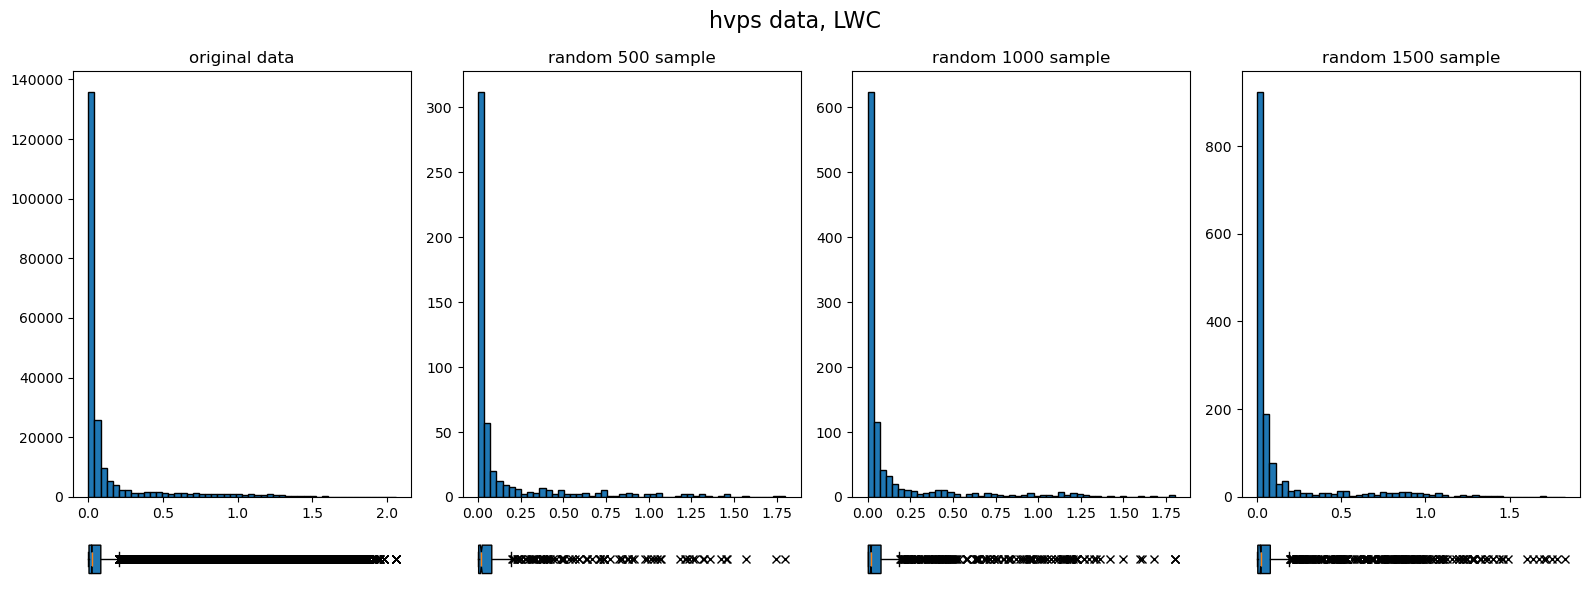

In [66]:
# Loop over the columns of axes (axs is a 2x4 grid)
probe = 'hvps' # hvps all ch01
variable = 'LWC' # Euclidean_d_max, wind_w, LWC, pres
n_bins = 50

data_names = ['og_df', 'sample_500','sample_1000','sample_1500']
plt_names = ['original data', 'random 500 sample', 'random 1000 sample','random 1500 sample']

fig, axs = plt.subplots(2,len(data_names),gridspec_kw={"height_ratios": (0.90, 0.1)}, figsize=(16, 6), tight_layout=True)
for i in range(len(data_names)):
    data = random_choice[probe][data_names[i]][variable]
    ax_hist = axs[0, i] # The histogram axis
    ax_box = axs[1, i]   # The boxplot axis
    
    # Plot histogram
    ax_hist.hist(data, bins=n_bins, edgecolor='black')
    ax_hist.set_title(plt_names[i])
    #ax_hist.set_xlabel(variable_units[i])
    
    # Plot boxplot
    ax_box.axis('off') 
    outlier = dict(marker = 'x')
    ax_box.boxplot(data, vert=False,  flierprops = outlier, widths = 0.6, notch=True, patch_artist=True)  # Horizontal boxplot

fig.suptitle(f'{probe} data, {variable}', fontsize=16)
    
plt.show()

## numbers associated with random sampling

In [67]:
#data_names = ['og', '500','']
print(f'{probe} data, {variable}')
print(110 * "_")
print(f"{'data':<15}{'mean':>10}{'median':>10}{'25%':>10}{'75%':>10}{'IQR':>10}{'std':>10}{'min':>10}{'max':>10}{'range':>10}")
print(110 * "_")
for i in range(len(data_names)):
    data = random_choice[probe][data_names[i]][variable]
    sorted_data = np.sort(data)# values in numerical order - can do quartiles etc with!
    mean = np.mean(data)
    median = np.median(data)
    per_25 = np.percentile(sorted_data,25)
    per_75 = np.percentile(sorted_data,75)
    scipy_iqr = iqr(data)
    minimum = sorted_data[0]
    maximum = sorted_data[-1]
    range_v = maximum - minimum
    std_deviation = np.std(data)
    print(f"{data_names[i]:<15}{mean:>10.2f}{median:>10.2f}{per_25:>10.2f}{per_75:>10.2f}{scipy_iqr:>10.2f}{std_deviation:>10.2f}{minimum:>10.2f}{maximum:>10.2f}{range_v:>10.2f}")

print(110 * "_")


hvps data, LWC
______________________________________________________________________________________________________________
data                 mean    median       25%       75%       IQR       std       min       max     range
______________________________________________________________________________________________________________
og_df                0.15      0.02      0.00      0.08      0.08      0.31      0.00      2.06      2.06
sample_500           0.14      0.02      0.00      0.08      0.08      0.31      0.00      1.80      1.80
sample_1000          0.14      0.02      0.00      0.08      0.07      0.30      0.00      1.80      1.80
sample_1500          0.14      0.02      0.00      0.08      0.07      0.30      0.00      1.83      1.83
______________________________________________________________________________________________________________
